In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

In [4]:
#Sampling at random from a Gaussian Distribution

def randGauss(mu, sigma):
    z= np.random.uniform(0,1)
    r=math.sqrt(-2*sigma**2*math.log(1-z))
    theta=np.random.uniform(0, 2*math.pi)
    x=r*math.cos(theta)
    return x+mu


#Defining the Cooling schedule

def ExpoCooling(T_i, T_f, tau, t):
    cool=math.exp(-t/tau)
    return T_i*cool +T_f*(1-cool)    

##### Part-A

In [5]:
def func(x):
    return x**2-math.cos(4*math.pi*x)

tau =0.5
T_i=3
T_f=1e-80
max_count=10000
x=2
k_b=1 #just assuming a self-consistent unit system where k_b is 1
x_plot=[]

for i in range(max_count):
    delta=randGauss(0,1)
    T=ExpoCooling(T_i, T_f, tau, i)
    x_new=x+delta
    if(func(x_new)<func(x)):
        x=x_new
    else:
        diff=func(x+delta)-func(x)
        prob=math.exp(-(diff)/(k_b*T))
        if(prob<=1e-180):
            pass
        else:
            N=int(1/prob)
            y=np.random.uniform(0,N)
            if(y<1):
                x=x_new
    x_plot.append(x)
print(x)

1.6446753242309656e-05


<Figure size 1440x1440 with 0 Axes>

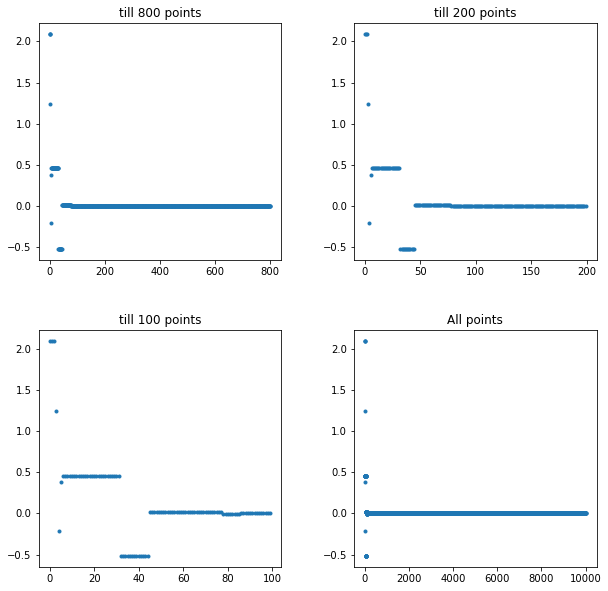

In [6]:
#Plotting some initial points because the solution stabilises long before the counter becomes too big
plt.figure(figsize=(20,20))
fig, axis= plt.subplots(2,2, figsize=(10,10))

axis[0,0].plot(x_plot[:800], ".")
axis[0,0].set_title("till 800 points")
axis[0,1].plot(x_plot[:200], ".")
axis[0,1].set_title("till 200 points")
axis[1,0].plot(x_plot[:100], ".")
axis[1,0].set_title("till 100 points")
axis[1,1].plot(x_plot, ".")
axis[1,1].set_title("All points")


plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


In this case is it pretty evident that there are sudden fluctuations in the figure, the higher points are first there and then we have random choice of points which yield a lower value fo the energy and the x_new changes to that. At time goes by the temperature drops and transition to higher states become nearly impossible, the state settles at nearly, 0. There can be different answers based on runs. More fluctuations when temperature has alreaduy dropped a lot, is correlated with higher answer in my personal observation.

##### Part-B

In [7]:
def func1(x):
    return math.cos(x)+math.cos(math.sqrt(2)*x)+math.cos(math.sqrt(3)*x)

tau =500
T_i=2
T_f=1e-80
max_count=100000
x1=np.random.uniform(0,50)
k_b=1 #just assuming a self-consistent unit system where k_b is 1
x1_plot=[]

for i in range(max_count):
    delta=randGauss(0,1)
    T=ExpoCooling(T_i, T_f, tau, i)
    x_new=x1+delta
    if(func1(x_new)<func1(x1)):
        x1=x_new
    else:
        diff=func1(x_new)-func1(x1)
        prob=math.exp(-(diff)/(k_b*T))
        if(prob<=1e-180):
            pass
        else:
            N=int(1/prob)
            y=np.random.uniform(0,N)
            if(y<1):
                x1=x_new
    x1_plot.append(x1)
print(x1)


15.959494108904936


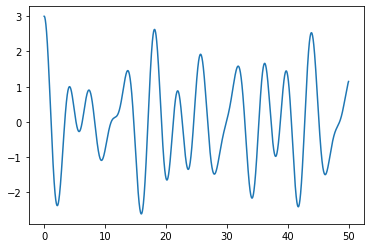

In [8]:
x=np.linspace(0,50,5000)
y=[func1(ele) for ele in x]

plt.plot(x,y)

 

As evident there are too many local minimas, so, the function is often giving answers like 9, 27, 34, 45. Which are not the minima. This is happening because the cooling rate is too high, and the solution is getting stuck once it is hitting a minima.

Increasing the decay time from 5 to 50 makes the solution converge to approximately 15.9595, but sometimes to 41.74 and other minimas were achieved soometimes, although rare. Making the decay time for the cooling rate 500 makes the program converge into the right minima with extremely high probabililty.

The coooling law here is given by:

<b><font color="purple">$$T= T_i e^{-\frac{t}{\tau}}+T_f (1- e^{-\frac{t}{\tau}})$$<font color> <b>